In [1]:
import os

base_path = "/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images"

# List all subdirectories
subfolders = [f.path for f in os.scandir(base_path) if f.is_dir()]

print("Subfolders:")
for folder in subfolders:
    print(folder)


Subfolders:
/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images/Swarna
/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images/Katari Siddho
/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images/Beroi
/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images/BR-29
/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images/Katari Najir
/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images/Miniket
/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images/Chinigura
/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images/Ghee Bhog
/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images/BR-28
/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images/Aush


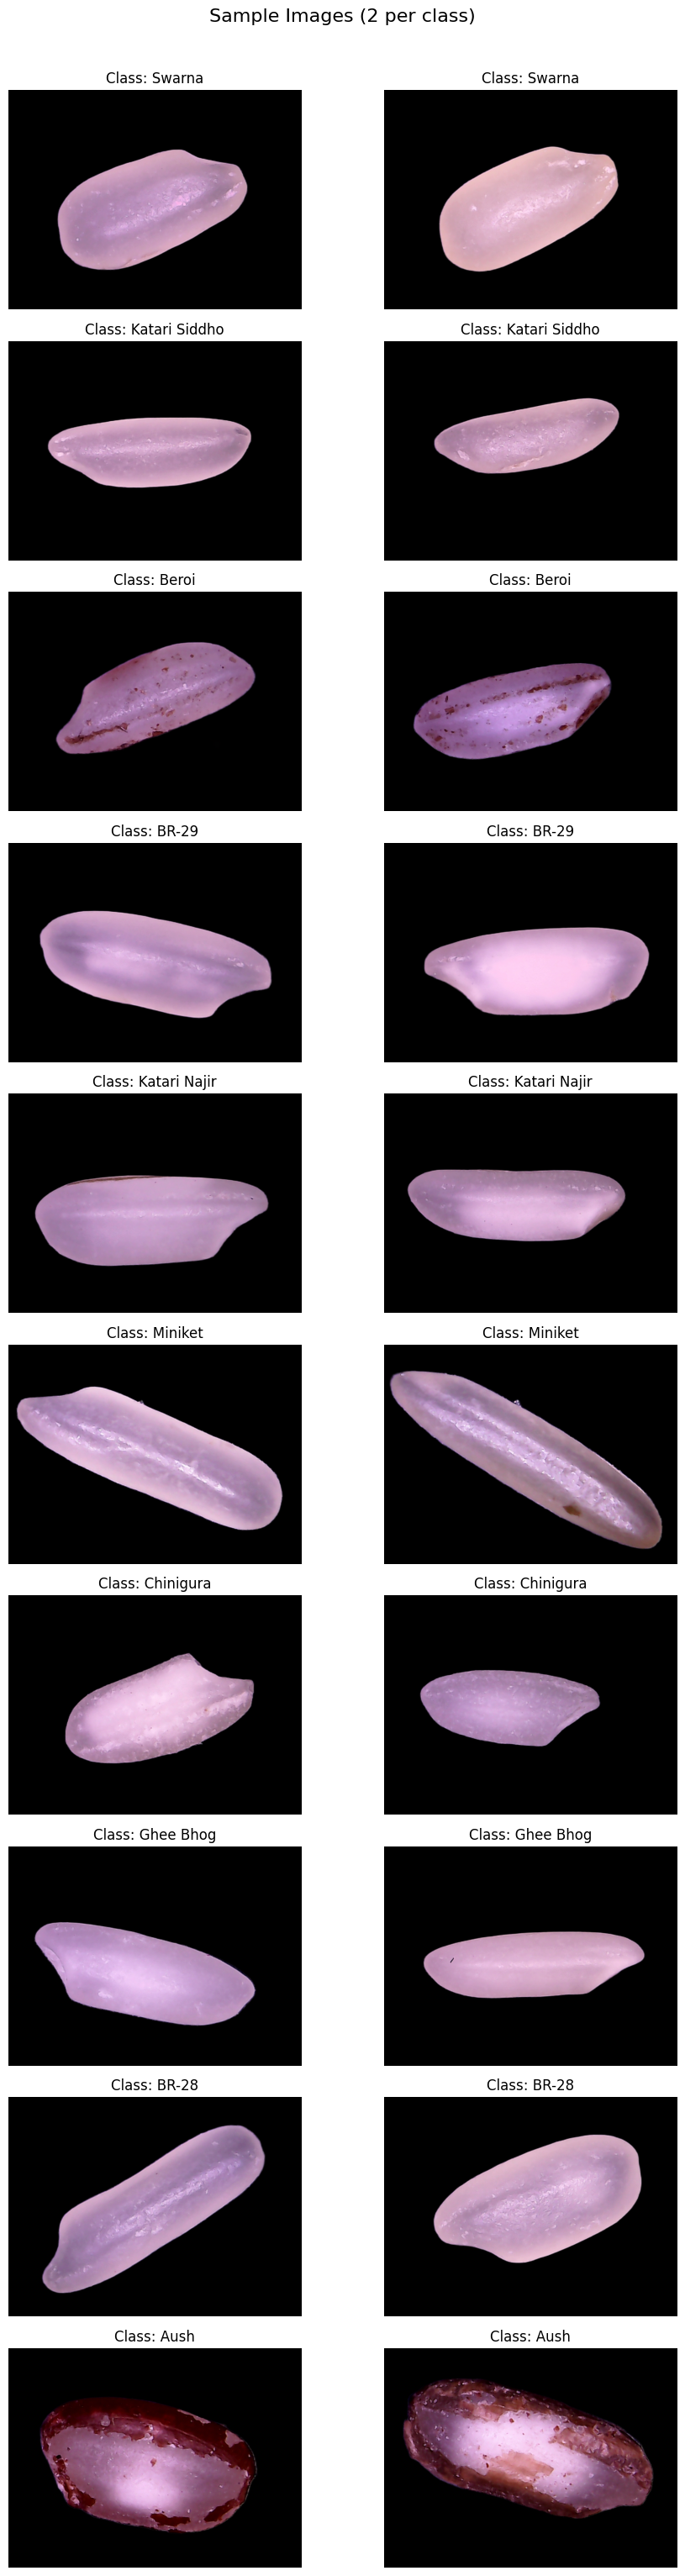

In [18]:
import os
import cv2
import matplotlib.pyplot as plt

BASE_DIR = "/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images"
VALID_EXT = ('.jpg', '.JPG')  

sample_images = []

for class_name in os.listdir(BASE_DIR):
    class_path = os.path.join(BASE_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    count = 0
    for fname in os.listdir(class_path):
        if not fname.endswith(VALID_EXT):
            continue

        img_path = os.path.join(class_path, fname)
        img = cv2.imread(img_path)

        if img is None:
            print(f" Could not load: {img_path}")
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        sample_images.append((class_name, img_rgb))

        count += 1
        if count >= 2:
            break  

# Plotting
n = len(sample_images)
cols = 2
rows = (n + 1) // cols

plt.figure(figsize=(10, rows * 3))

for i, (cls, img) in enumerate(sample_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"Class: {cls}")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Sample Images (2 per class)", fontsize=16, y=1.02)
plt.show()



In [6]:
import os, cv2, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import seaborn as sns
from skimage import color
import imagehash
from collections import defaultdict


Processing class (RGB hist): Aush
Processing class (RGB hist): BR-28
Processing class (RGB hist): BR-29
Processing class (RGB hist): Beroi
Processing class (RGB hist): Chinigura
Processing class (RGB hist): Ghee Bhog
Processing class (RGB hist): Katari Najir
Processing class (RGB hist): Katari Siddho
Processing class (RGB hist): Miniket
Processing class (RGB hist): Swarna


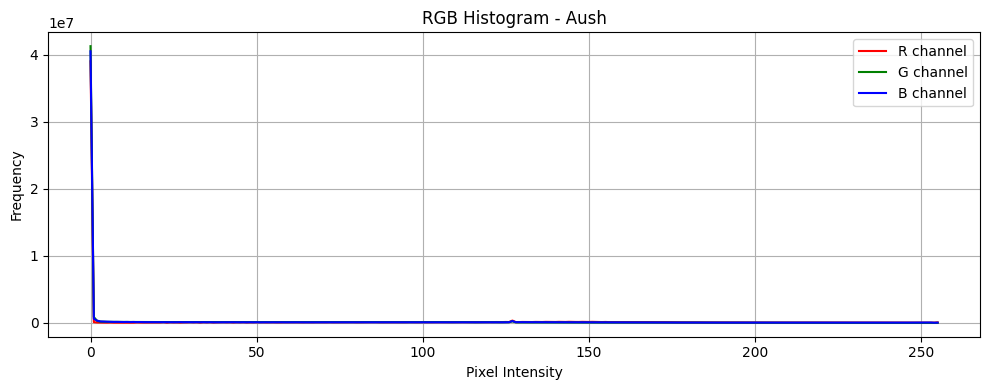

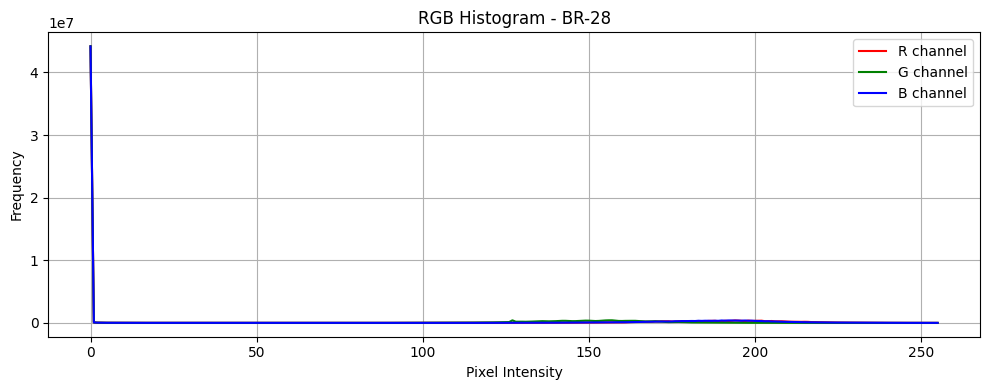

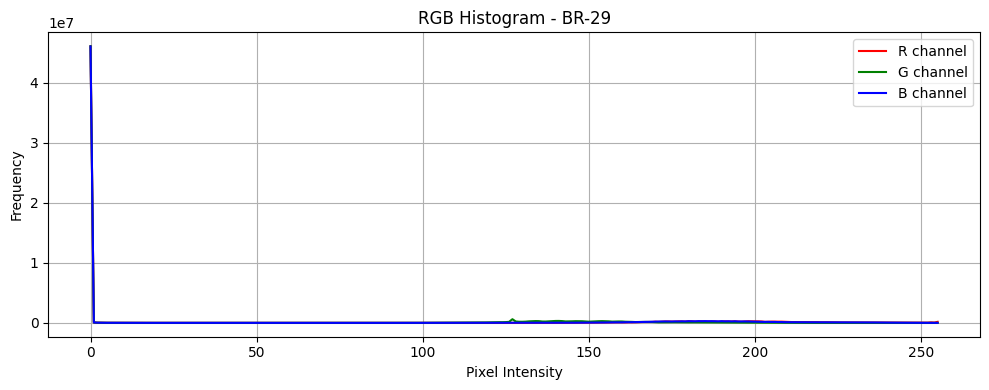

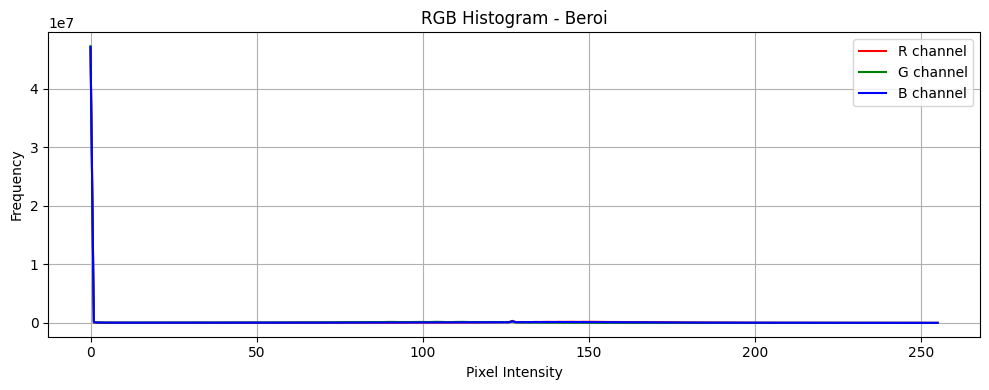

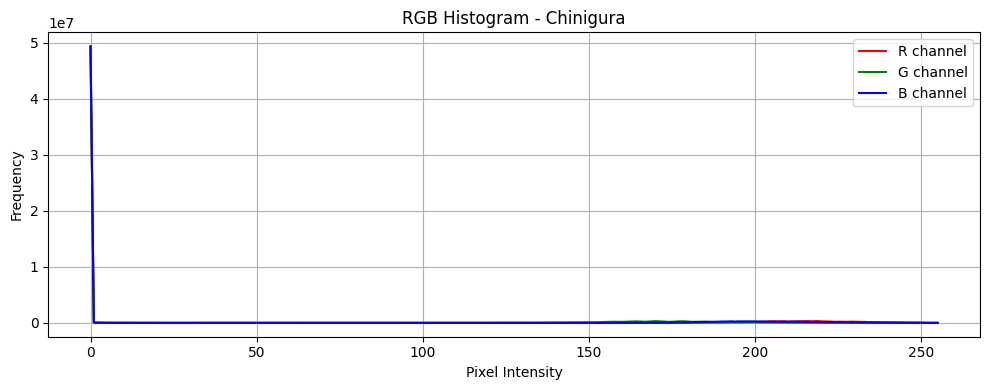

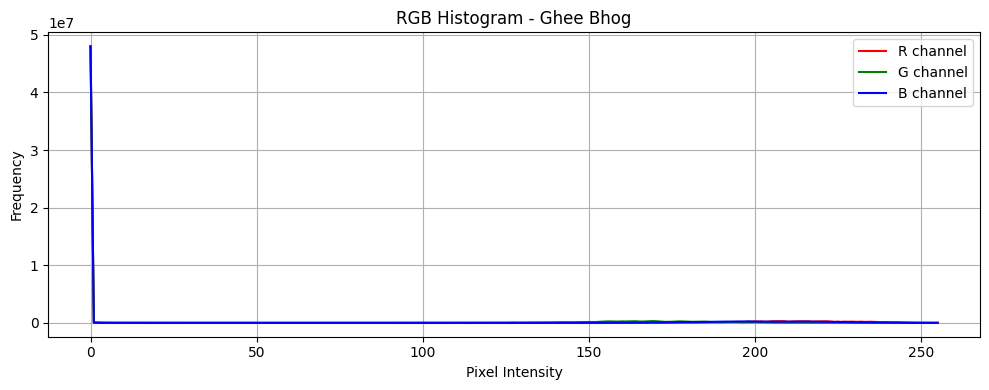

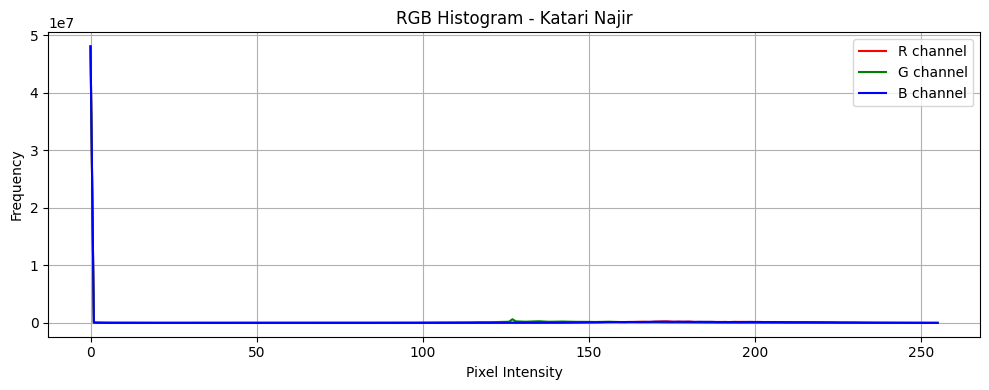

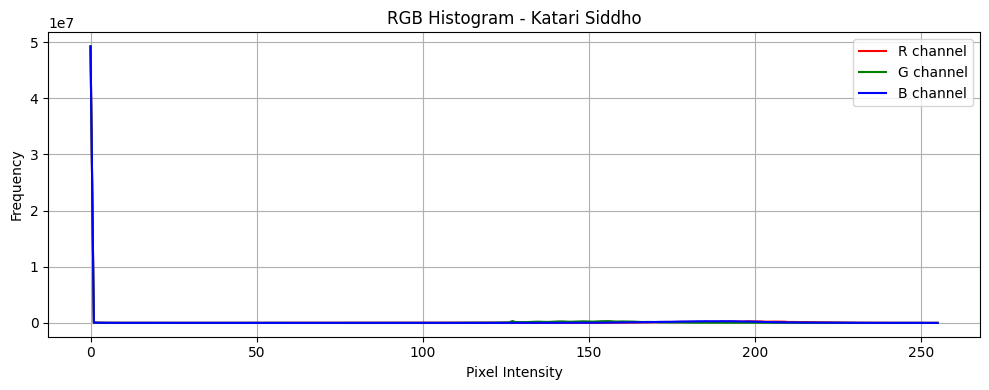

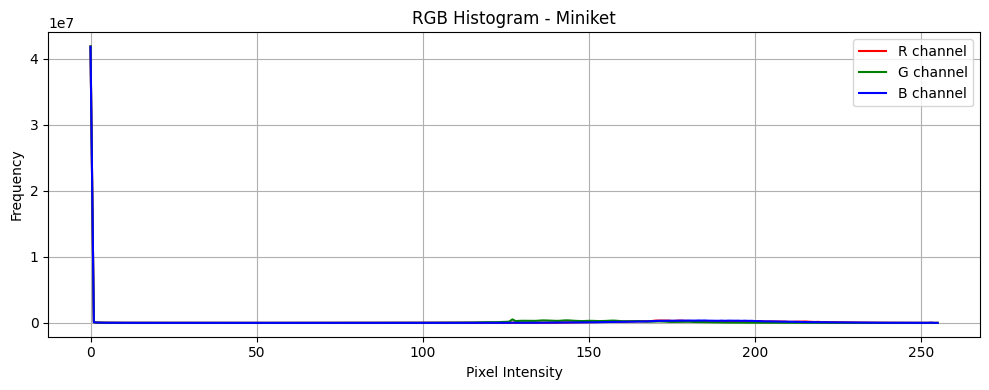

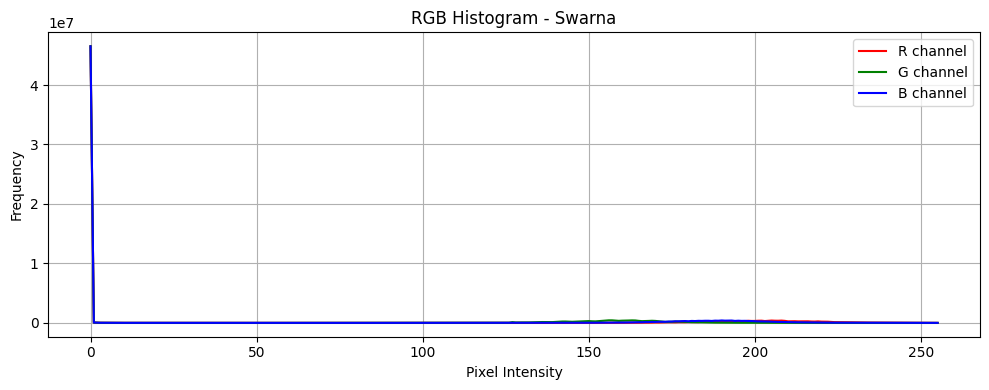

Processing stats for Swarna: 100%|██████████| 200/200 [00:17<00:00, 11.68it/s]


R_mean        G_mean        B_mean        brightness         \
                mean    std   mean    std   mean    std       mean    std   
class                                                                       
Aush           44.54  11.42  26.25  10.17  34.25  12.41      44.73  11.55   
BR-28          51.55   8.71  41.20   7.17  51.24   8.71      52.37   8.81   
BR-29          46.90   5.37  36.34   4.23  46.32   4.96      47.45   5.27   
Beroi          30.34   5.91  19.52   5.61  28.08   7.58      31.29   6.59   
Chinigura      41.01   4.81  33.34   3.84  38.77   4.87      41.06   4.81   
Ghee Bhog      45.08   4.00  35.91   3.32  42.69   3.93      45.21   4.00   
Katari Najir   38.55   7.29  30.56   5.90  38.78   7.34      39.25   7.36   
Katari Siddho  37.08   5.61  28.94   4.37  35.96   5.16      37.46   5.57   
Miniket        57.26   6.56  46.69   5.42  57.39   6.69      58.44   6.67   
Swarna         47.78   5.77  37.60   4.66  44.79   5.31      47.89   5.76   

              contrast        saturation         
                  mean    std       mean    std  
class                                            
Aush             59.22  13.77      49.60  12.65  
BR-28            78.55   6.85      15.75   2.32  
BR-29            77.14   5.64      15.41   1.87  
Beroi            51.71   9.75      25.09   6.19  
Chinigura        78.01   3.88      10.13   1.57  
Ghee Bhog        80.00   3.75      11.91   1.24  
Katari Najir     70.00   7.63      12.82   1.95  
Katari Siddho    69.94   5.49      11.88   1.47  
Miniket          81.22   4.77      17.21   1.83  
Swarna           78.30   5.31      13.57   1.36

In [22]:
import os
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


# CONFIG

BASE_DIR = "/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images"
VALID_EXT = ('.jpg', '.jpeg', '.png')


# 1. CLASS-WISE RGB HISTOGRAMS

class_rgb_histograms = {}

for class_name in sorted(os.listdir(BASE_DIR)):
    class_path = os.path.join(BASE_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    print(f"Processing class (RGB hist): {class_name}")
    rgb_hist = [np.zeros((256,), dtype=np.float32) for _ in range(3)]

    for fname in os.listdir(class_path):
        if not fname.lower().endswith(VALID_EXT):
            continue

        img_path = os.path.join(class_path, fname)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read {img_path}")
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        for i in range(3):
            hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
            rgb_hist[i] += hist.flatten()

    class_rgb_histograms[class_name] = rgb_hist



# 2. PER-CLASS HISTOGRAM PLOTS

for class_name, hist_list in class_rgb_histograms.items():
    plt.figure(figsize=(10, 4))
    colors = ['r', 'g', 'b']
    for i, color in enumerate(colors):
        plt.plot(hist_list[i], color=color, label=f'{color.upper()} channel')
    plt.title(f"RGB Histogram - {class_name}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



# 3. RGB & HSV STATISTICS

color_data = []
classes = sorted(os.listdir(BASE_DIR))

for cls in classes:
    class_path = os.path.join(BASE_DIR, cls)
    if not os.path.isdir(class_path):
        continue

    files = glob.glob(f"{class_path}/*.jpg") + glob.glob(f"{class_path}/*.png") + glob.glob(f"{class_path}/*.jpeg")
    for f in tqdm(files, desc=f"Processing stats for {cls}"):
        img = cv2.imread(f)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

        # Per-image statistics
        rgb_mean, rgb_std = img.mean(axis=(0,1)), img.std(axis=(0,1))
        hsv_mean, hsv_std = hsv.mean(axis=(0,1)), hsv.std(axis=(0,1))

        # Derived metrics
        brightness = hsv[...,2].mean()
        contrast = img.std()
        saturation = hsv[...,1].mean()
        sat_clip = np.mean(hsv[...,1] > 250)

        color_data.append([cls, *rgb_mean, *rgb_std, *hsv_mean, *hsv_std,
                           brightness, contrast, saturation, sat_clip])

# DataFrame 
cols = ['class',
        'R_mean','G_mean','B_mean','R_std','G_std','B_std',
        'H_mean','S_mean','V_mean','H_std','S_std','V_std',
        'brightness','contrast','saturation','sat_clip']
df_color = pd.DataFrame(color_data, columns=cols)

# -----------------------------------
# 4. PER-CLASS SUMMARY TABLE
# -----------------------------------
class_summary = df_color.groupby('class').agg(['mean','std']).round(2)
display(class_summary[['R_mean','G_mean','B_mean','brightness','contrast','saturation']])



Processing class: Aush
Processing class: BR-28
Processing class: BR-29
Processing class: Beroi
Processing class: Chinigura
Processing class: Ghee Bhog
Processing class: Katari Najir
Processing class: Katari Siddho
Processing class: Miniket
Processing class: Swarna


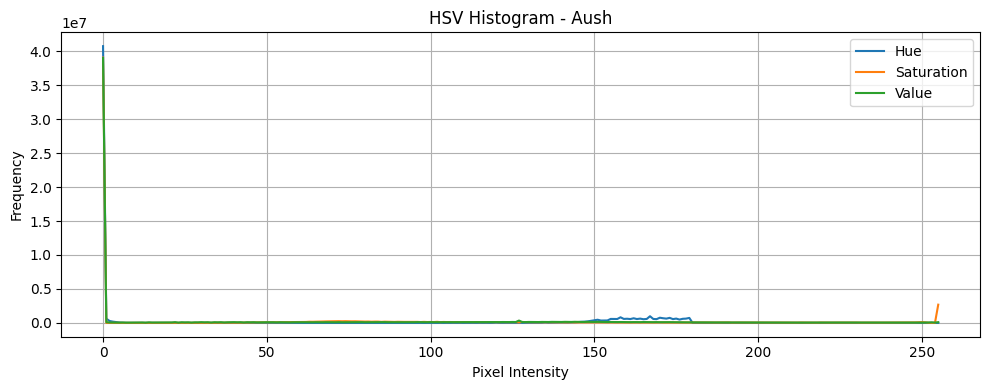

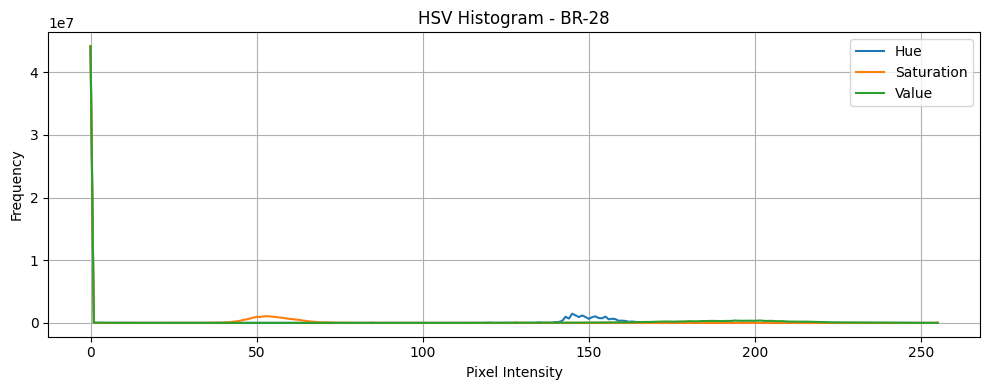

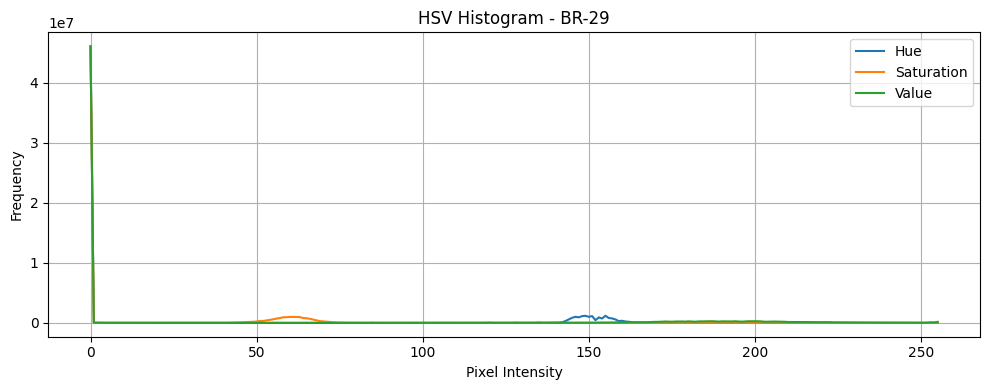

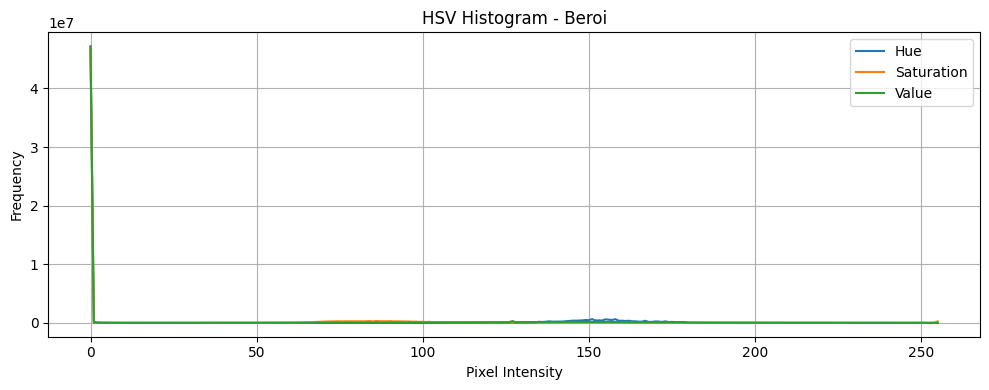

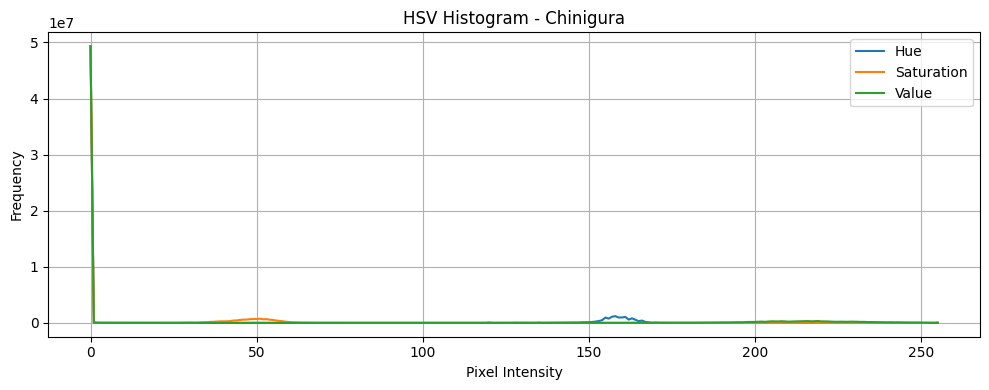

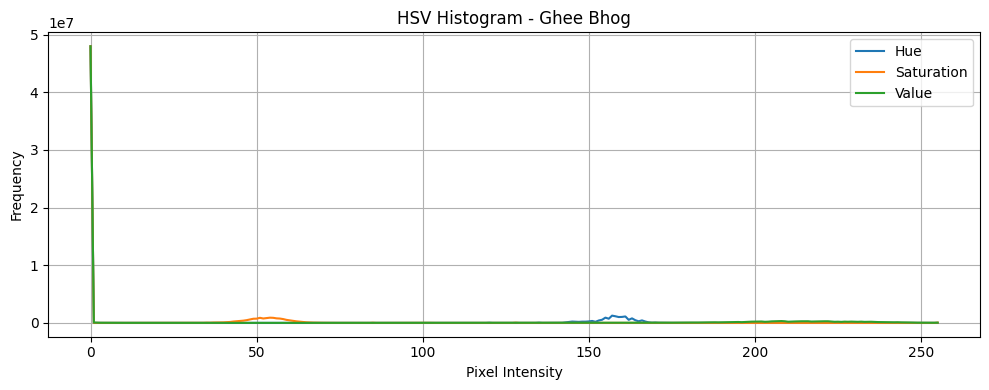

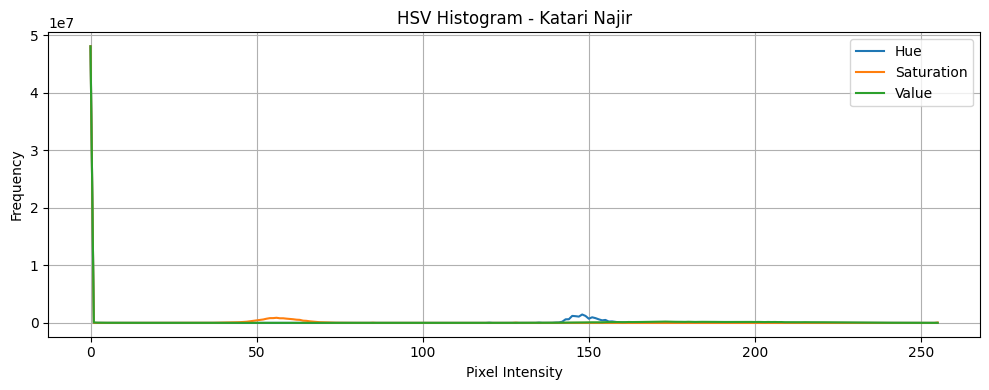

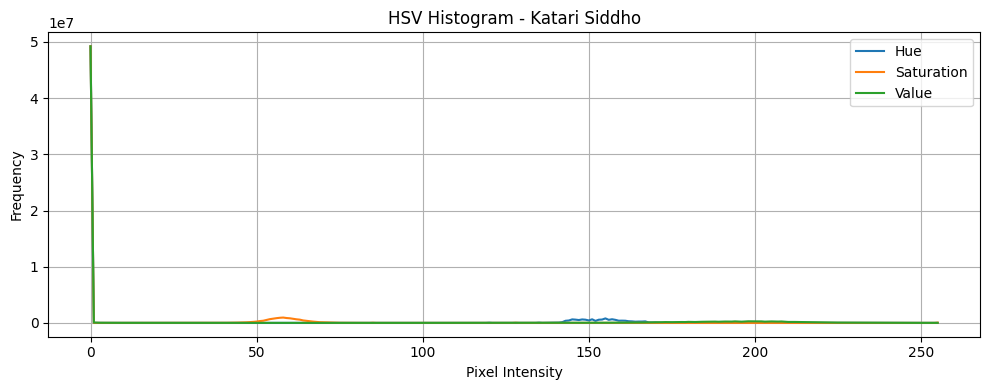

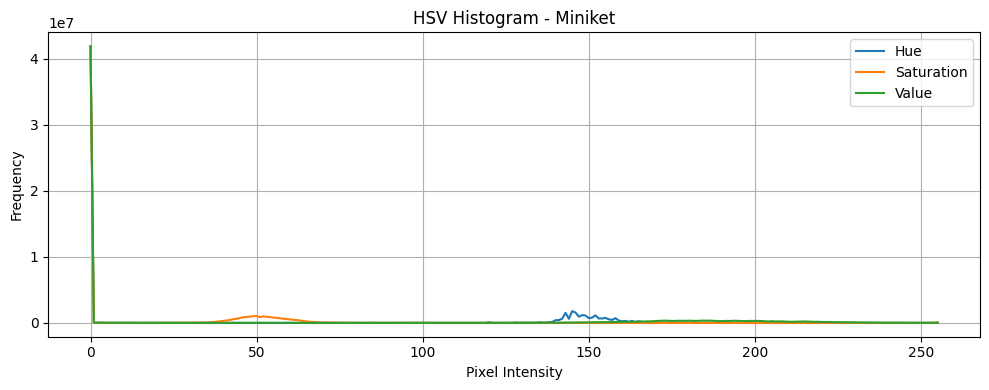

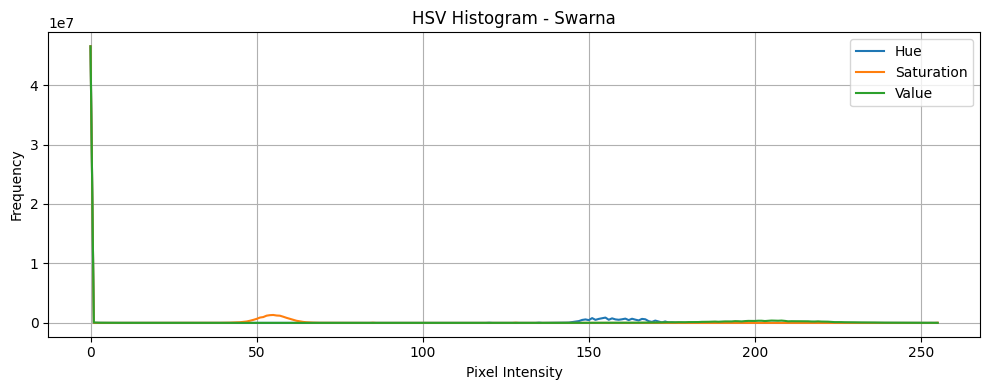

In [23]:
#HSV
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

BASE_DIR = "/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images"
VALID_EXT = ('.jpg', '.jpeg', '.png')

# Dictionary to hold per-class HSV histograms
class_hsv_histograms = {}

for class_name in sorted(os.listdir(BASE_DIR)):
    class_path = os.path.join(BASE_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    print(f"Processing class: {class_name}")

    # Initialize zero histogram for each HSV channel
    hsv_hist = [np.zeros((256,), dtype=np.float32) for _ in range(3)]

    for fname in os.listdir(class_path):
        if not fname.lower().endswith(VALID_EXT):
            continue

        img_path = os.path.join(class_path, fname)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read {img_path}")
            continue

        # Convert BGR (OpenCV) to HSV
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Calculate histogram for each channel and accumulate
        for i in range(3):
            hist = cv2.calcHist([img_hsv], [i], None, [256], [0, 256])
            hsv_hist[i] += hist.flatten()

    # Store histogram per class
    class_hsv_histograms[class_name] = hsv_hist

# Plot all classes HSV histograms
for class_name, hist_list in class_hsv_histograms.items():
    plt.figure(figsize=(10, 4))
    labels = ['Hue', 'Saturation', 'Value']
    for i, label in enumerate(labels):
        plt.plot(hist_list[i], label=label)
    plt.title(f"HSV Histogram - {class_name}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


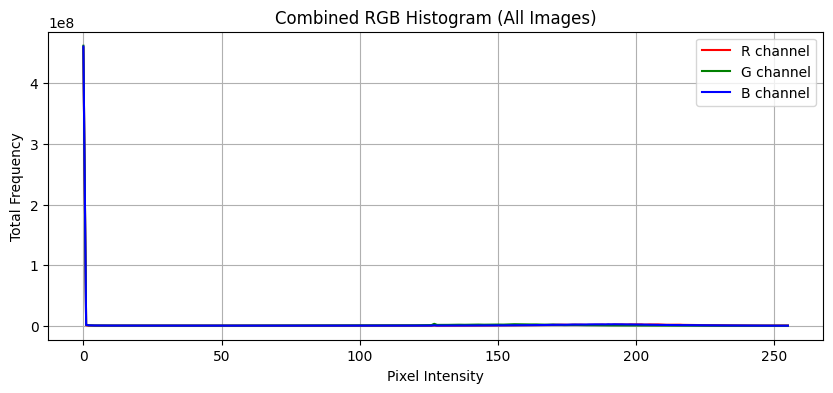

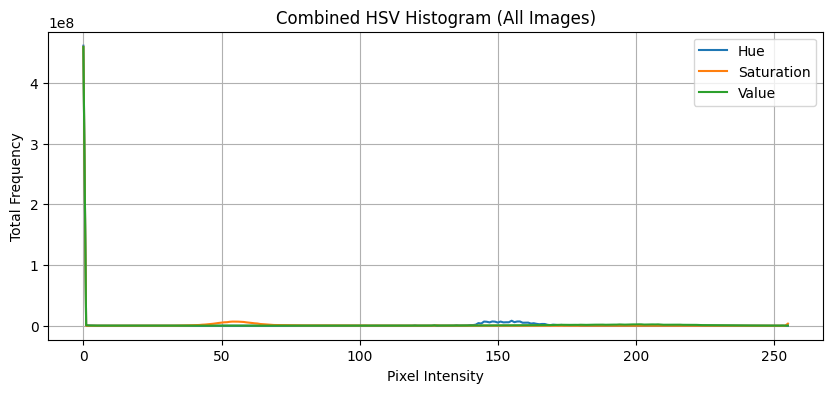

In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


BASE_DIR = "/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images"
VALID_EXT = ('.jpg',)

rgb_hist = [np.zeros((256,), dtype=np.float32) for i in range(3)]  
hsv_hist = [np.zeros((256,), dtype=np.float32) for i in range(3)]  


for class_name in os.listdir(BASE_DIR):
    class_path = os.path.join(BASE_DIR, class_name)
    if not os.path.isdir(class_path): continue

    for fname in os.listdir(class_path):
        if not fname.lower().endswith(VALID_EXT): continue

        img_path = os.path.join(class_path, fname)
        img = cv2.imread(img_path)
        if img is None: continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        
        for i in range(3):
            hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
            rgb_hist[i] += hist.flatten()

    
        for i in range(3):
            hist = cv2.calcHist([img_hsv], [i], None, [256], [0, 256])
            hsv_hist[i] += hist.flatten()


plt.figure(figsize=(10, 4))
for i, color in enumerate(['r', 'g', 'b']):
    plt.plot(rgb_hist[i], color=color, label=f'{color.upper()} channel')
plt.title("Combined RGB Histogram (All Images)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Total Frequency")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
for i, label in enumerate(['Hue', 'Saturation', 'Value']):
    plt.plot(hsv_hist[i], label=label)
plt.title("Combined HSV Histogram (All Images)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Total Frequency")
plt.legend()
plt.grid(True)
plt.show()


Processing class: Swarna
Processing class: Katari Siddho
Processing class: Beroi
Processing class: BR-29
Processing class: Katari Najir
Processing class: Miniket
Processing class: Chinigura
Processing class: Ghee Bhog
Processing class: BR-28
Processing class: Aush
🔹 Sample of per-image brightness/contrast stats:
    class                         image  brightness_mean  brightness_std  \
0  Swarna  processed_S20250322_0074.jpg        39.732962       70.806771   
1  Swarna  processed_S20250322_0059.jpg        44.201318       80.964475   
2  Swarna  processed_S20250322_0212.jpg        49.368366       82.465456   
3  Swarna  processed_S20250322_0133.jpg        39.882738       72.822039   
4  Swarna  processed_S20250322_0055.jpg        42.941253       78.070246   

   brightness_min  brightness_max  contrast_range  
0               0             225             225  
1               0             241             241  
2               0             232             232  
3               0    

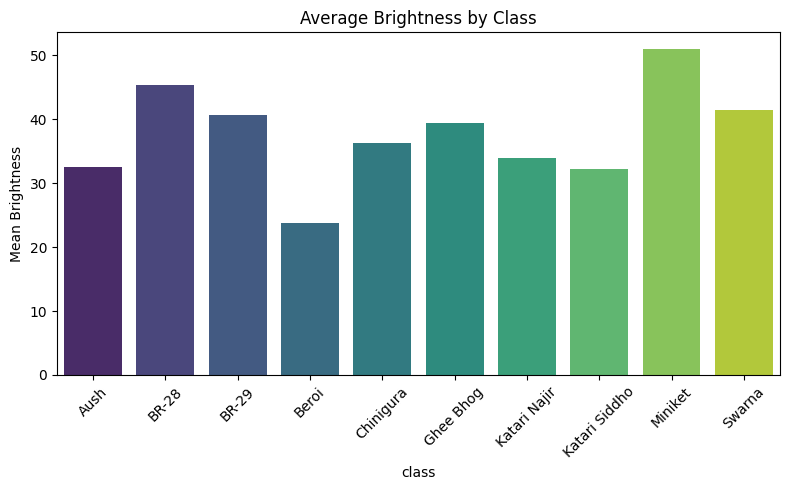

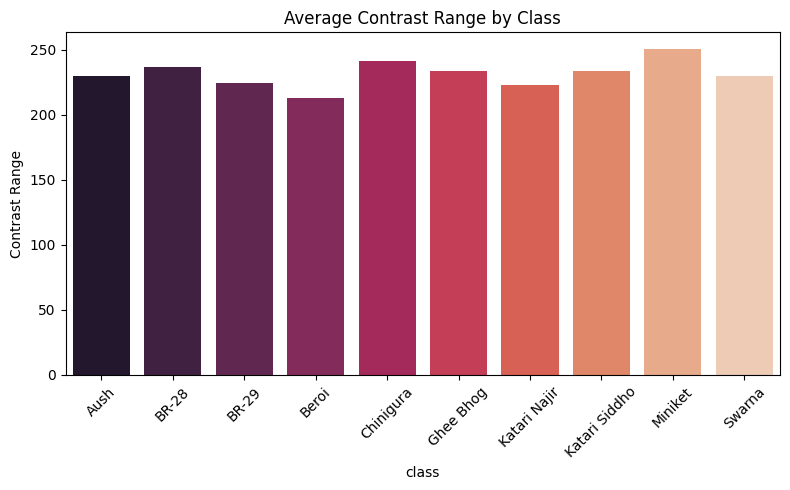

In [27]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Path
BASE_DIR = "/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images"
VALID_EXT = ('.jpg', '.jpeg', '.png')  # All common formats

image_stats = []

# Loop through all class folders
for class_name in os.listdir(BASE_DIR):
    class_path = os.path.join(BASE_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    print(f"Processing class: {class_name}")

    for fname in os.listdir(class_path):
        if not fname.lower().endswith(VALID_EXT):  # Handle all extensions
            continue

        img_path = os.path.join(class_path, fname)
        img = cv2.imread(img_path)
        if img is None:
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Calculate brightness and contrast metrics
        brightness_mean = np.mean(gray)
        brightness_std = np.std(gray)
        brightness_min = np.min(gray)
        brightness_max = np.max(gray)
        contrast_range = brightness_max - brightness_min

        image_stats.append({
            "class": class_name,
            "image": fname,
            "brightness_mean": brightness_mean,
            "brightness_std": brightness_std,
            "brightness_min": brightness_min,
            "brightness_max": brightness_max,
            "contrast_range": contrast_range
        })

# DataFrame
df = pd.DataFrame(image_stats)

print(" Sample of per-image brightness/contrast stats:")
print(df.head())

df_class_summary = df.groupby("class").agg({
    "brightness_mean": ['mean', 'std'],
    "brightness_std": ['mean', 'std'],
    "contrast_range": ['mean', 'std']
})

# Flatten multi-level columns
df_class_summary.columns = ['_'.join(col).strip() for col in df_class_summary.columns.values]
df_class_summary = df_class_summary.reset_index()

print("\n Per-class brightness & contrast summary:")
print(df_class_summary)

# Brightness by class
plt.figure(figsize=(8, 5))
sns.barplot(data=df_class_summary, x="class", y="brightness_mean_mean", palette="viridis")
plt.title("Average Brightness by Class")
plt.ylabel("Mean Brightness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Contrast range by class
plt.figure(figsize=(8, 5))
sns.barplot(data=df_class_summary, x="class", y="contrast_range_mean", palette="rocket")
plt.title("Average Contrast Range by Class")
plt.ylabel("Contrast Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


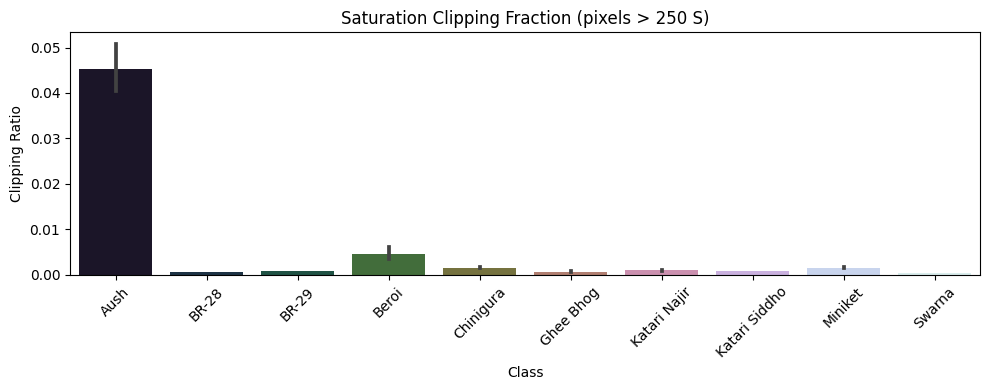

In [28]:

# 5. SATURATION CLIPPING CHECK

plt.figure(figsize=(10,4))
sns.barplot(data=df_color, x='class', y='sat_clip', palette='cubehelix')
plt.xticks(rotation=45)
plt.title("Saturation Clipping Fraction (pixels > 250 S)", fontsize=12)
plt.xlabel("Class")
plt.ylabel("Clipping Ratio")
plt.tight_layout()
plt.show()


In [29]:
def resize_and_pad(image, size=(224, 224), pad_color=0):
    h, w = image.shape[:2]
    sh, sw = size

    scale = min(sw / w, sh / h)
    new_w, new_h = int(w * scale), int(h * scale)

    resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)

    pad_w = (sw - new_w) // 2
    pad_h = (sh - new_h) // 2

    padded = cv2.copyMakeBorder(resized, pad_h, sh - new_h - pad_h, pad_w, sw - new_w - pad_w,
                                 borderType=cv2.BORDER_CONSTANT, value=pad_color)
    return padded


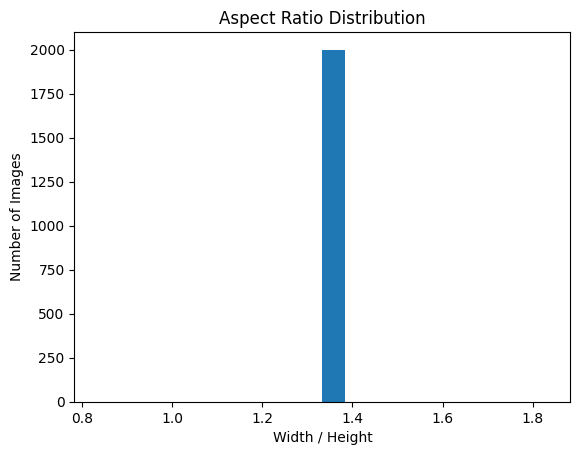

In [30]:
aspect_ratios = []

for fname in df['image']:
    img = cv2.imread(os.path.join(BASE_DIR, df[df['image']==fname]['class'].values[0], fname))
    if img is not None:
        h, w = img.shape[:2]
        aspect_ratios.append(w / h)

plt.hist(aspect_ratios, bins=20)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.ylabel("Number of Images")
plt.show()

Processing class: Aush
Processing class: BR-28
Processing class: BR-29
Processing class: Beroi
Processing class: Chinigura
Processing class: Ghee Bhog
Processing class: Katari Najir
Processing class: Katari Siddho
Processing class: Miniket
Processing class: Swarna


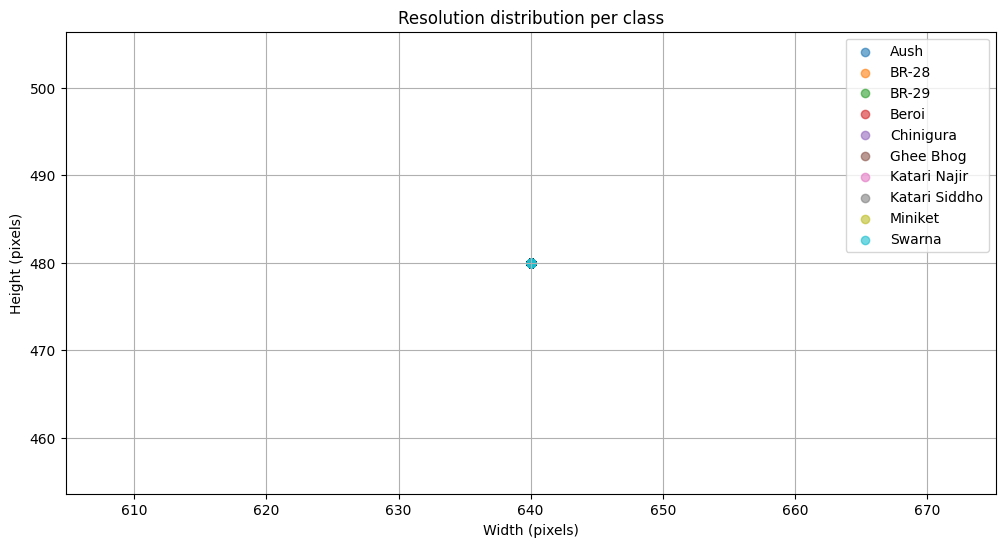

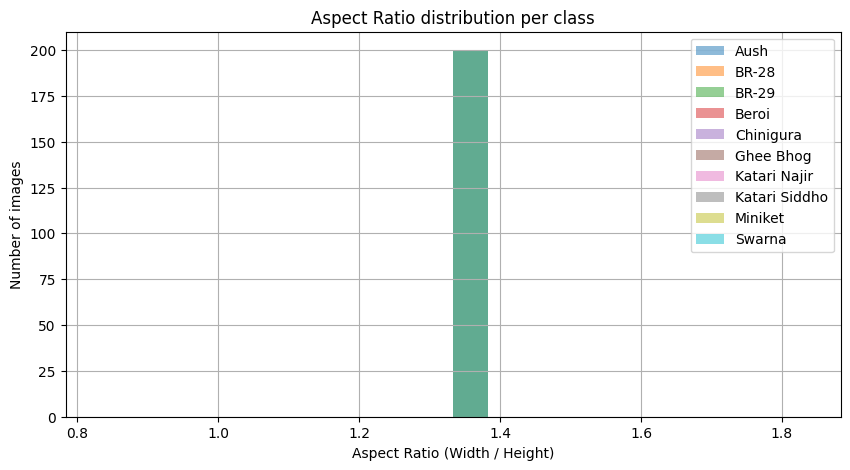

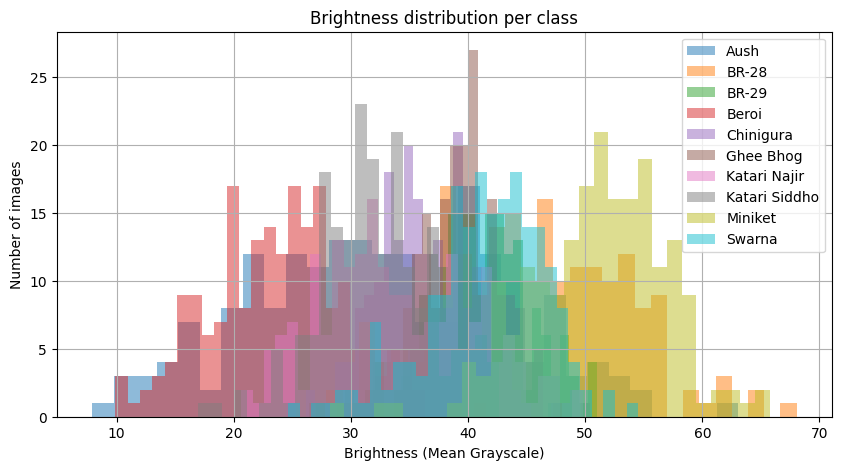

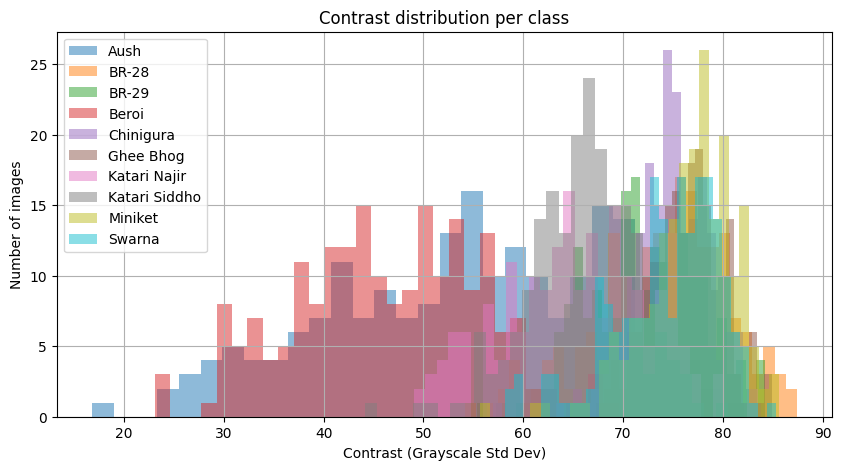

In [31]:
#class-wise effects
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

BASE_DIR = "/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images"
VALID_EXT = ('.jpg', '.jpeg', '.png')

# List to hold info per image
image_info = []

for class_name in sorted(os.listdir(BASE_DIR)):
    class_path = os.path.join(BASE_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    print(f"Processing class: {class_name}")

    for fname in os.listdir(class_path):
        if not fname.lower().endswith(VALID_EXT):
            continue

        img_path = os.path.join(class_path, fname)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read {img_path}")
            continue

        h, w = img.shape[:2]
        aspect_ratio = w / h

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        brightness = gray.mean()
        contrast = gray.std()

        image_info.append({
            "class": class_name,
            "image": fname,
            "width": w,
            "height": h,
            "aspect_ratio": aspect_ratio,
            "brightness": brightness,
            "contrast": contrast
        })

# Convert to DataFrame
df = pd.DataFrame(image_info)


plt.figure(figsize=(12, 6))
for cls in df['class'].unique():
    subset = df[df['class'] == cls]
    plt.scatter(subset['width'], subset['height'], label=cls, alpha=0.6)
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.title('Resolution distribution per class')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
for cls in df['class'].unique():
    subset = df[df['class'] == cls]
    plt.hist(subset['aspect_ratio'], bins=20, alpha=0.5, label=cls)
plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Number of images')
plt.title('Aspect Ratio distribution per class')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
for cls in df['class'].unique():
    subset = df[df['class'] == cls]
    plt.hist(subset['brightness'], bins=30, alpha=0.5, label=cls)
plt.xlabel('Brightness (Mean Grayscale)')
plt.ylabel('Number of images')
plt.title('Brightness distribution per class')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
for cls in df['class'].unique():
    subset = df[df['class'] == cls]
    plt.hist(subset['contrast'], bins=30, alpha=0.5, label=cls)
plt.xlabel('Contrast (Grayscale Std Dev)')
plt.ylabel('Number of images')
plt.title('Contrast distribution per class')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
import os
import cv2
import numpy as np
import pandas as pd

BASE_DIR = "/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images"
VALID_EXT = ('.jpg',)

image_stats = []

for class_name in os.listdir(BASE_DIR):
    class_path = os.path.join(BASE_DIR, class_name)
    if not os.path.isdir(class_path): continue

    for fname in os.listdir(class_path):
        if not fname.lower().endswith(VALID_EXT): continue

        img_path = os.path.join(class_path, fname)
        img = cv2.imread(img_path)
        if img is None: continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        mean = np.mean(gray)
        std = np.std(gray)

        image_stats.append({
            "class": class_name,
            "image": fname,
            "mean": mean,
            "std": std
        })

df_image = pd.DataFrame(image_stats)
print(" Per-image stats:")
print(df_image.head())

df_class = df_image.groupby("class").agg({
    "mean": ['mean', 'std'],
    "std": ['mean', 'std']
})
df_class.columns = ['_'.join(col) for col in df_class.columns]
df_class = df_class.reset_index()

print("\n Per-class aggregated stats:")
print(df_class)


 Per-image stats:
    class                         image       mean        std
0  Swarna  processed_S20250322_0074.jpg  39.732962  70.806771
1  Swarna  processed_S20250322_0059.jpg  44.201318  80.964475
2  Swarna  processed_S20250322_0212.jpg  49.368366  82.465456
3  Swarna  processed_S20250322_0133.jpg  39.882738  72.822039
4  Swarna  processed_S20250322_0055.jpg  42.941253  78.070246

 Per-class aggregated stats:
           class  mean_mean   mean_std   std_mean    std_std
0           Aush  32.618703  10.723689  53.966337  13.496713
1          BR-28  45.448340   7.797197  73.891843   6.619522
2          BR-29  40.633427   4.623135  72.030952   5.661595
3          Beroi  23.719420   5.851373  46.221892   9.306009
4      Chinigura  36.258361   4.230638  74.737612   3.764049
5      Ghee Bhog  39.426954   3.564113  76.098755   3.859152
6   Katari Najir  33.889192   6.476644  65.523312   7.305170
7  Katari Siddho  32.175680   4.807961  65.749661   5.388948
8        Miniket  51.070524   5

Analyzing Swarna: 100%|██████████| 200/200 [00:02<00:00, 76.55it/s]

 Data collected: 2000 images across 10 classes


width      height      aspect_ratio      lap_var         \
                mean  std   mean  std         mean  std    mean    std   
class                                                                    
Aush           640.0  0.0  480.0  0.0         1.33  0.0  234.99  75.10   
BR-28          640.0  0.0  480.0  0.0         1.33  0.0   81.72  19.41   
BR-29          640.0  0.0  480.0  0.0         1.33  0.0   53.63   9.12   
Beroi          640.0  0.0  480.0  0.0         1.33  0.0   89.80  19.23   
Chinigura      640.0  0.0  480.0  0.0         1.33  0.0   80.50   9.75   
Ghee Bhog      640.0  0.0  480.0  0.0         1.33  0.0   57.82  10.61   
Katari Najir   640.0  0.0  480.0  0.0         1.33  0.0   48.69  10.67   
Katari Siddho  640.0  0.0  480.0  0.0         1.33  0.0   77.86  11.18   
Miniket        640.0  0.0  480.0  0.0         1.33  0.0  120.98  17.70   
Swarna         640.0  0.0  480.0  0.0         1.33  0.0   68.04  10.23   

              noise_std        
                   mean   std  
class                          
Aush               3.61  0.56  
BR-28              2.75  0.31  
BR-29              2.41  0.23  
Beroi              2.31  0.25  
Chinigura          2.71  0.15  
Ghee Bhog          2.54  0.25  
Katari Najir       2.20  0.24  
Katari Siddho      2.77  0.21  
Miniket            3.24  0.20  
Swarna             2.69  0.19

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

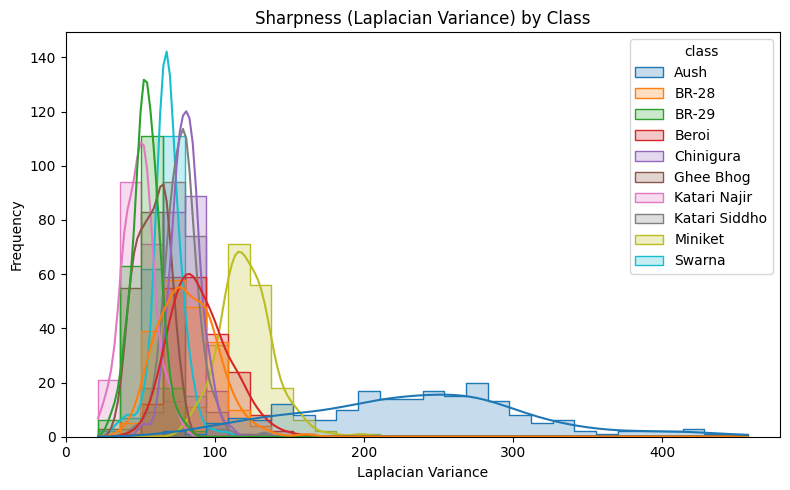

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

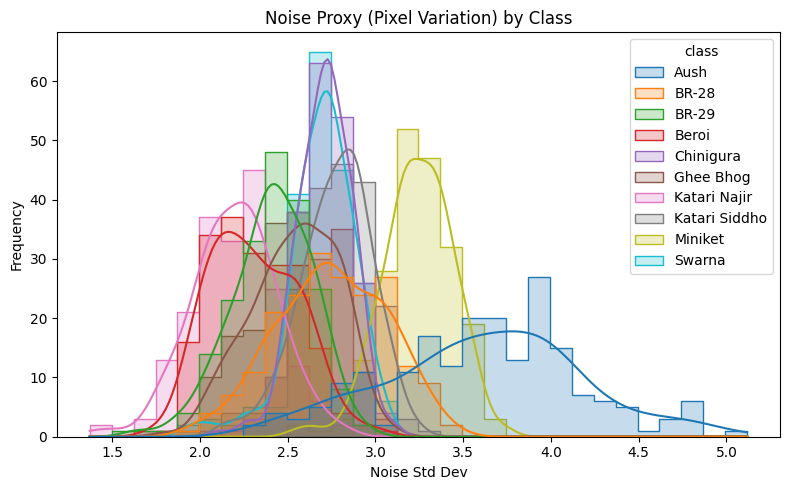

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

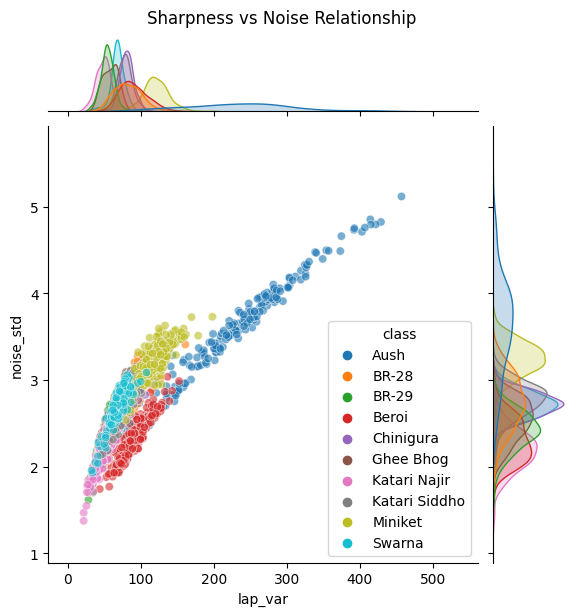

In [32]:
import os, cv2, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


# PATH

BASE_PATH = "/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images"
classes = sorted(os.listdir(BASE_PATH))


#  Helper Functions

def laplacian_variance(img):
    """Sharpness metric: higher value = sharper image"""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

def noise_proxy(img):
    """Light noise proxy: std of difference between image and blurred version"""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)
    residual = cv2.absdiff(gray, blurred)
    return residual.std()


# Compute Laplacian variance & noise proxy per image

records = []
for cls in classes:
    files = glob.glob(f"{BASE_PATH}/{cls}/*.jpg")
    for f in tqdm(files, desc=f"Analyzing {cls}"):
        img = cv2.imread(f)
        if img is None:
            continue
        lap_var = laplacian_variance(img)
        noise_std = noise_proxy(img)
        h, w, _ = img.shape
        aspect = w / h
        records.append([cls, f, w, h, aspect, lap_var, noise_std])

df_focus = pd.DataFrame(records, columns=['class','path','width','height','aspect_ratio','lap_var','noise_std'])

print(" Data collected:", len(df_focus), "images across", len(classes), "classes")


# Class-wise summary

summary = df_focus.groupby('class')[['width','height','aspect_ratio','lap_var','noise_std']].agg(['mean','std']).round(2)
display(summary)



#  Sharpness & Noise Distributions

plt.figure(figsize=(8,5))
sns.histplot(data=df_focus, x='lap_var', hue='class', kde=True, bins=30, element='step')
plt.title("Sharpness (Laplacian Variance) by Class", fontsize=12)
plt.xlabel("Laplacian Variance")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=df_focus, x='noise_std', hue='class', kde=True, bins=30, element='step')
plt.title("Noise Proxy (Pixel Variation) by Class", fontsize=12)
plt.xlabel("Noise Std Dev")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#  Sharpness vs Noise Correlation

sns.jointplot(data=df_focus, x='lap_var', y='noise_std', hue='class', alpha=0.6, height=6)
plt.suptitle("Sharpness vs Noise Relationship", y=1.02)
plt.show()


mean    std
class                      
Aush           0.239  0.077
BR-28          0.101  0.007
BR-29          0.113  0.008
Beroi          0.194  0.047
Chinigura      0.086  0.007
Ghee Bhog      0.096  0.007
Katari Najir   0.107  0.006
Katari Siddho  0.108  0.006
Miniket        0.094  0.005
Swarna         0.100  0.005

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

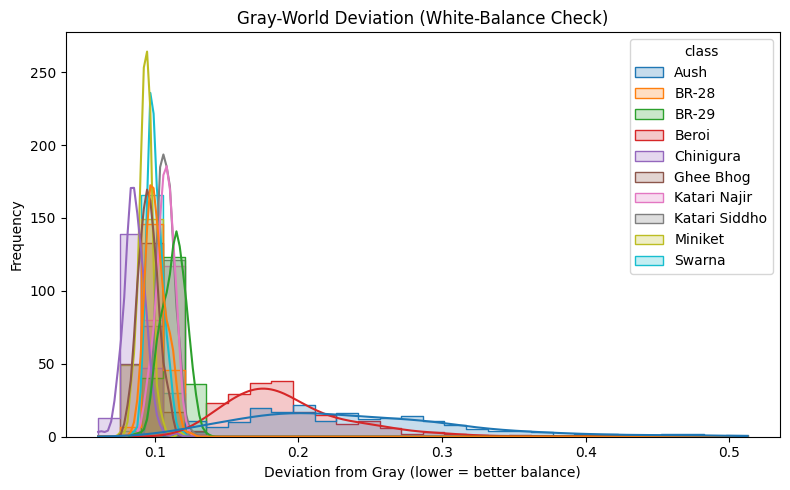

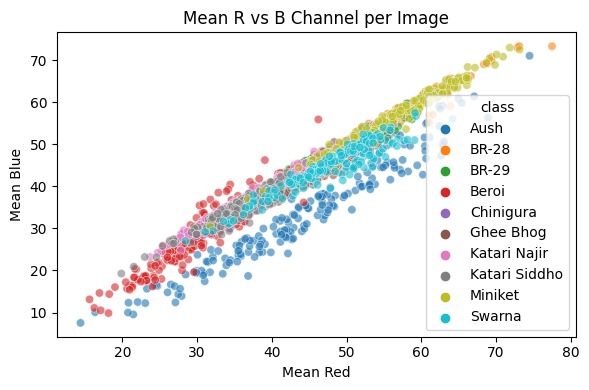

In [11]:

#  WHITE-BALANCE (GRAY-WORLD) CHECK

def gray_world_deviation(img):
    """
    Gray-world assumption: average R, G, B should be roughly equal.
    Returns deviation from perfect gray balance (lower = better).
    """
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mean_rgb = img_rgb.mean(axis=(0, 1))
    # normalize to average brightness
    norm = mean_rgb / mean_rgb.mean()
    deviation = np.std(norm)  # std of [R_norm, G_norm, B_norm]
    return deviation, mean_rgb

wb_records = []

for cls in classes:
    files = glob.glob(f"{BASE_PATH}/{cls}/*.jpg")
    for f in files:
        img = cv2.imread(f)
        if img is None:
            continue
        dev, mean_rgb = gray_world_deviation(img)
        wb_records.append([cls, f, *mean_rgb, dev])

df_wb = pd.DataFrame(wb_records,
                     columns=['class','path','R_mean','G_mean','B_mean','gray_dev'])


# Class-wise gray-world deviation summary

wb_summary = df_wb.groupby('class')['gray_dev'].agg(['mean','std']).round(3)
display(wb_summary)


# Visualization

plt.figure(figsize=(8,5))
sns.histplot(data=df_wb, x='gray_dev', hue='class', bins=30, kde=True, element='step')
plt.title("Gray-World Deviation (White-Balance Check)", fontsize=12)
plt.xlabel("Deviation from Gray (lower = better balance)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Optional: visualize mean RGB ratios
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_wb, x='R_mean', y='B_mean', hue='class', alpha=0.6)
plt.title("Mean R vs B Channel per Image")
plt.xlabel("Mean Red"); plt.ylabel("Mean Blue")
plt.tight_layout()
plt.show()


Hashing Swarna: 100%|██████████| 200/200 [00:01<00:00, 115.24it/s]


🔍 Total images checked: 2000
⚠️ Possible duplicates found: 370


img1  \
0  /kaggle/input/processed-rice-varieties-of-bang...   
1  /kaggle/input/processed-rice-varieties-of-bang...   
2  /kaggle/input/processed-rice-varieties-of-bang...   
3  /kaggle/input/processed-rice-varieties-of-bang...   
4  /kaggle/input/processed-rice-varieties-of-bang...   

                                                img2  distance  
0  /kaggle/input/processed-rice-varieties-of-bang...         4  
1  /kaggle/input/processed-rice-varieties-of-bang...         4  
2  /kaggle/input/processed-rice-varieties-of-bang...         4  
3  /kaggle/input/processed-rice-varieties-of-bang...         4  
4  /kaggle/input/processed-rice-varieties-of-bang...         4

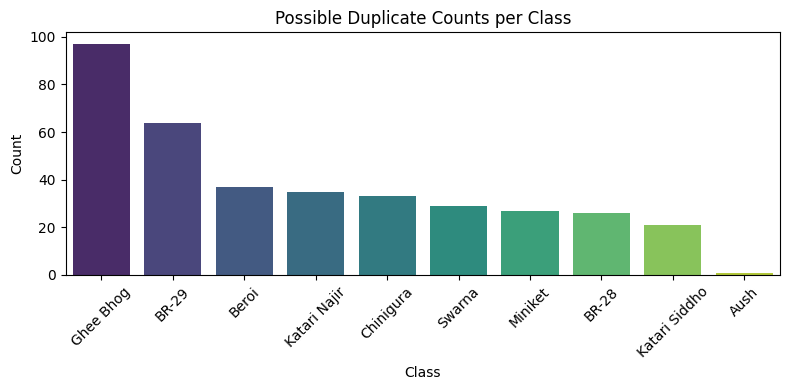

In [12]:

#  DUPLICATE DETECTION (Perceptual Hashing)

from PIL import Image
import imagehash

# Compute perceptual hashes (pHash)
hash_records = []

for cls in classes:
    files = glob.glob(f"{BASE_PATH}/{cls}/*.jpg")
    for f in tqdm(files, desc=f"Hashing {cls}"):
        try:
            with Image.open(f) as img:
                phash = imagehash.phash(img)
                hash_records.append([cls, f, str(phash)])
        except:
            pass

df_hash = pd.DataFrame(hash_records, columns=['class','path','phash'])


# Detect potential duplicates

# Hamming distance threshold (0 = identical, <=5 = visually very similar)
def hamming_distance(hash1, hash2):
    return bin(int(hash1, 16) ^ int(hash2, 16)).count('1')

potential_dupes = []
hash_list = df_hash['phash'].values
path_list = df_hash['path'].values

for i in range(len(hash_list)):
    for j in range(i+1, len(hash_list)):
        dist = hamming_distance(hash_list[i], hash_list[j])
        if dist <= 5:  # can adjust threshold
            potential_dupes.append([path_list[i], path_list[j], dist])

df_dupes = pd.DataFrame(potential_dupes, columns=['img1','img2','distance'])

# -------------------------------
# Summary & Visualization

print(f" Total images checked: {len(df_hash)}")
print(f" Possible duplicates found: {len(df_dupes)}")

if not df_dupes.empty:
    display(df_dupes.head())
else:
    print("No near-duplicate images detected (within distance ≤ 5).")

# Optional: plot duplicate counts per class
dupe_count = df_dupes['img1'].apply(lambda x: x.split('/')[-2]).value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=dupe_count.index, y=dupe_count.values, palette="viridis")
plt.title("Possible Duplicate Counts per Class")
plt.xlabel("Class"); plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


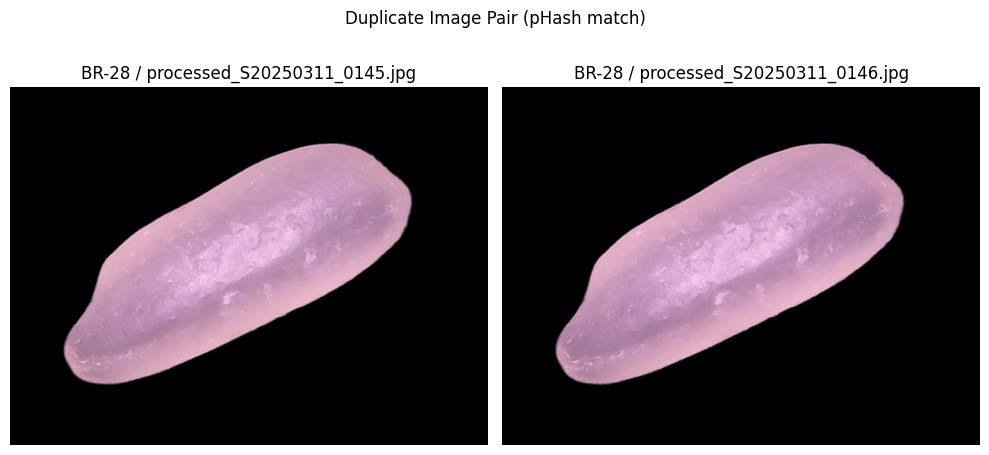

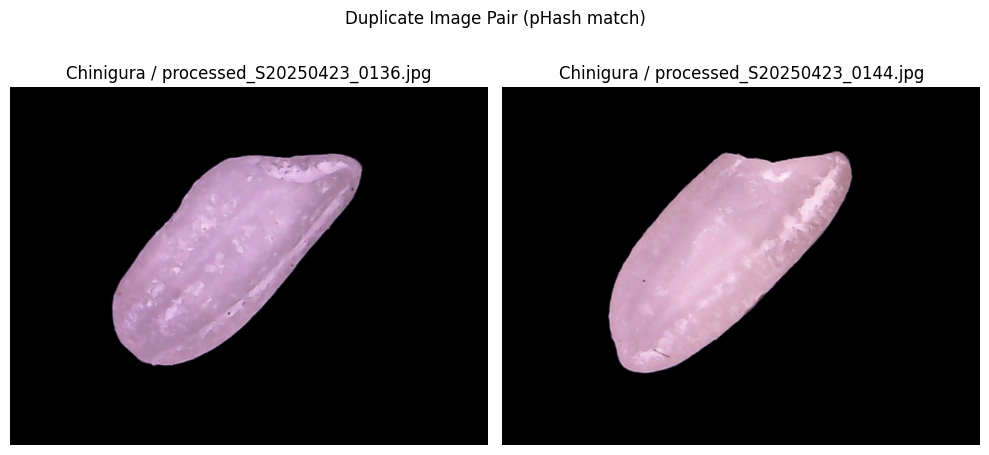

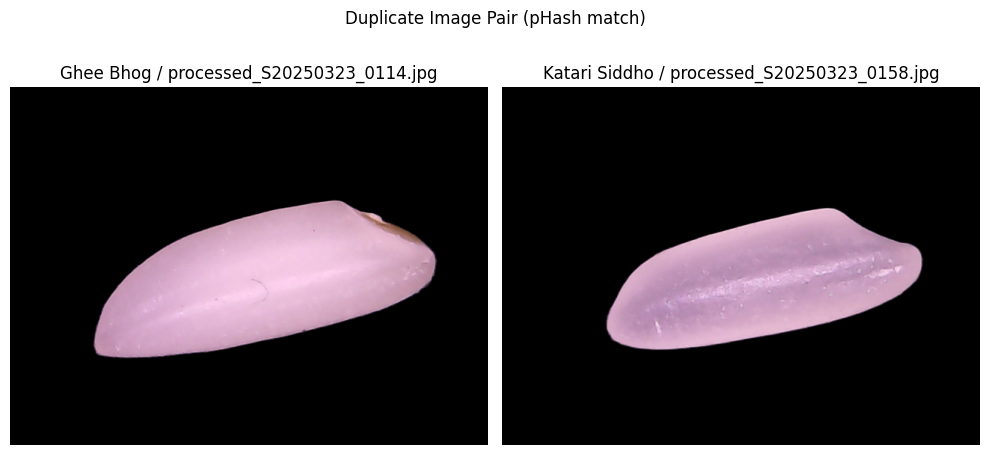

In [34]:
import matplotlib.pyplot as plt
import cv2
import os

# duplicate groups 
duplicates = {
    "c29e3861cfe6cc19": [("BR-28", "processed_S20250311_0145.jpg"), ("BR-28", "processed_S20250311_0146.jpg")],
    "cf9830676d1bc698": [("Chinigura", "processed_S20250423_0136.jpg"), ("Chinigura", "processed_S20250423_0144.jpg")],
    "973868c795384b37": [("Ghee Bhog", "processed_S20250323_0114.jpg"), ("Katari Siddho", "processed_S20250323_0158.jpg")]
}

BASE_DIR = "/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images"

def show_image_pair(class1, file1, class2, file2):
    path1 = os.path.join(BASE_DIR, class1, file1)
    path2 = os.path.join(BASE_DIR, class2, file2)

    img1 = cv2.cvtColor(cv2.imread(path1), cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(cv2.imread(path2), cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img1)
    axes[0].set_title(f"{class1} / {file1}")
    axes[0].axis("off")

    axes[1].imshow(img2)
    axes[1].set_title(f"{class2} / {file2}")
    axes[1].axis("off")

    plt.suptitle("Duplicate Image Pair (pHash match)")
    plt.tight_layout()
    plt.show()

# display duplicates
for hash_val, image_list in duplicates.items():
    if len(image_list) >= 2:
        show_image_pair(*image_list[0], *image_list[1])


class  count
0           Aush    200
1          BR-28    200
2          BR-29    200
3          Beroi    200
4      Chinigura    200
5      Ghee Bhog    200
6   Katari Najir    200
7  Katari Siddho    200
8        Miniket    200
9         Swarna    200

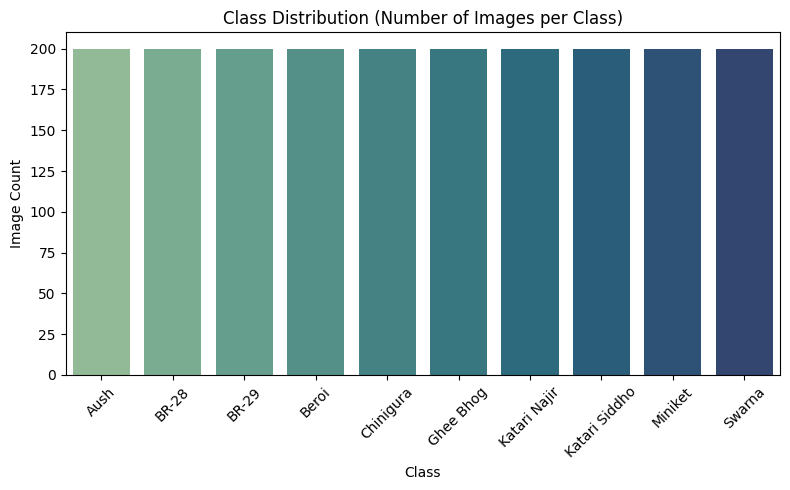

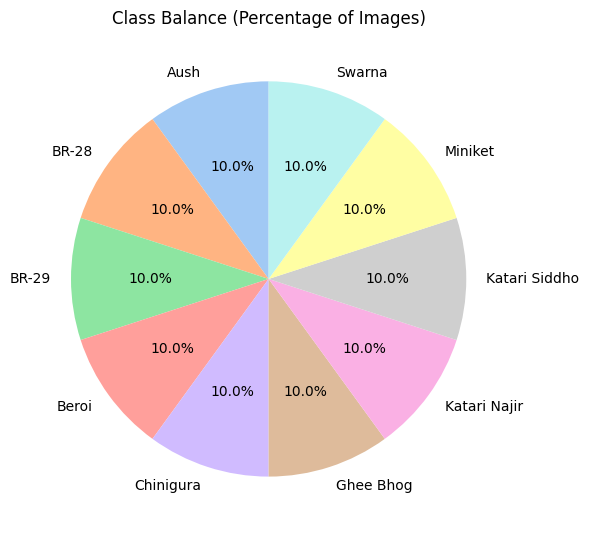

In [13]:

# CLASS BALANCE CHECK

import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
import pandas as pd

# Count number of images per class
class_counts = {cls: len(glob.glob(f"{BASE_PATH}/{cls}/*.jpg")) for cls in classes}
df_balance = pd.DataFrame(list(class_counts.items()), columns=['class', 'count'])

# Display table
display(df_balance.sort_values('count', ascending=False))


#  Bar Plot

plt.figure(figsize=(8,5))
sns.barplot(data=df_balance, x='class', y='count', palette="crest")
plt.title("Class Distribution (Number of Images per Class)", fontsize=12)
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  Pie Chart

plt.figure(figsize=(6,6))
plt.pie(df_balance['count'], labels=df_balance['class'], autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("pastel"))
plt.title("Class Balance (Percentage of Images)", fontsize=12)
plt.tight_layout()
plt.show()


Train images: 1600
Test images:  400


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


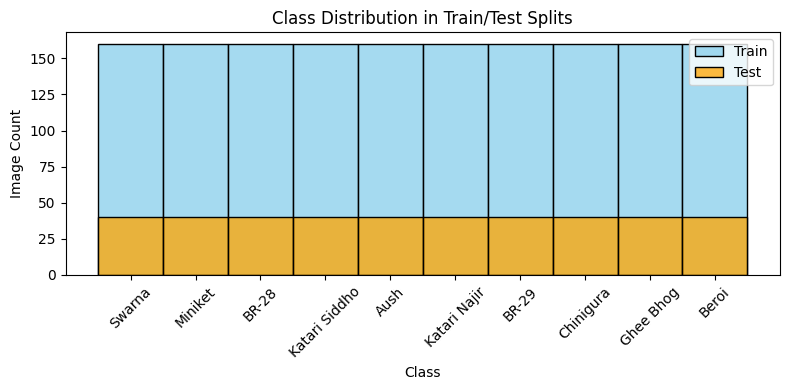

In [14]:

# 10. LEAKAGE-SAFE DATA SPLITTING

from sklearn.model_selection import GroupShuffleSplit, train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os


# Collect image paths with group identifier (source/ID)

records = []
for cls in classes:
    files = glob.glob(f"{BASE_PATH}/{cls}/*.jpg")
    for f in files:
        fname = os.path.basename(f)
        
        parts = fname.split('_')
        if len(parts) > 1:
            source_id = parts[0]  
        else:
            source_id = cls  
        records.append([cls, f, source_id])

df_split = pd.DataFrame(records, columns=['class', 'path', 'source_id'])


# Check number of unique source IDs

unique_sources = df_split['source_id'].nunique()


# Split

if unique_sources > 1:
    # Group-wise split if multiple sources exist
    splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
    train_idx, test_idx = next(splitter.split(df_split, groups=df_split['source_id']))
    train_df = df_split.iloc[train_idx].reset_index(drop=True)
    test_df = df_split.iloc[test_idx].reset_index(drop=True)
else:
    # Only one source ID — fallback to class-wise stratified split
    train_df, test_df = train_test_split(
        df_split, test_size=0.2, stratify=df_split['class'], random_state=42
    )
    train_df = train_df.reset_index(drop=True)
    test_df = test_df.reset_index(drop=True)


# Verify leakage

overlap = set(train_df['source_id']).intersection(set(test_df['source_id']))
if len(overlap) == 0:
    print("No source overlap detected between Train/Test sets (Leakage Safe).")
else:
    print(f"WARNING: {len(overlap)} overlapping source IDs found!")

print(f"Train images: {len(train_df)}")
print(f"Test images:  {len(test_df)}")


# Visualize class distribution in splits

plt.figure(figsize=(8,4))
sns.histplot(data=train_df, x='class', color='skyblue', label='Train', discrete=True, multiple="stack")
sns.histplot(data=test_df, x='class', color='orange', label='Test', discrete=True, multiple="stack")
plt.title("Class Distribution in Train/Test Splits")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import os
import cv2
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit

# Configuration
BASE_DIR = "/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images"
VALID_EXT = ('.jpg', '.jpeg', '.png')

def extract_group_id(fname):
    """
    Example filename: processed_S20250311_0145.jpg
    We might want group 'S20250311' as group id.
    """
    parts = fname.split('_')
    if len(parts) >= 2:
        return parts[1]
    else:
        return fname  # fallback

# DataFrame with path, class, group
rows = []
for cls in os.listdir(BASE_DIR):
    cls_path = os.path.join(BASE_DIR, cls)
    if not os.path.isdir(cls_path):
        continue
    for fname in os.listdir(cls_path):
        if not fname.lower().endswith(VALID_EXT):
            continue
        img_path = os.path.join(cls_path, fname)
        rows.append({
            "path": img_path,
            "class": cls,
            "filename": fname,
            "group": extract_group_id(fname)
        })

df = pd.DataFrame(rows)
print("Total images:", len(df))
print("Unique groups:", df['group'].nunique())
print("Group counts head:")
print(df['group'].value_counts().head())

# Leakage-proof split using groups 
splitter = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)


try:
    train_idx, val_idx = next(splitter.split(df, groups=df['group']))
except ValueError as e:
    print("Error splitting:", e)
    # Fallback to regular stratified split (if groups not enough)
    from sklearn.model_selection import train_test_split
    train_df, val_df = train_test_split(
        df,
        test_size=0.3,
        stratify=df['class'],
        random_state=42
    )
else:
    train_df = df.iloc[train_idx].reset_index(drop=True)
    val_df = df.iloc[val_idx].reset_index(drop=True)

print("Train size:", len(train_df))
print("Val size:", len(val_df))
print("Train classes count:\n", train_df['class'].value_counts())
print("Val classes count:\n", val_df['class'].value_counts())


Total images: 2000
Unique groups: 6
Group counts head:
group
S20250323    800
S20250325    400
S20250423    400
S20250322    200
S20250312    161
Name: count, dtype: int64
Train size: 1800
Val size: 200
Train classes count:
 class
Swarna           200
Katari Siddho    200
Beroi            200
BR-29            200
Katari Najir     200
Miniket          200
Chinigura        200
Ghee Bhog        200
Aush             200
Name: count, dtype: int64
Val classes count:
 class
BR-28    200
Name: count, dtype: int64


Detected rice varieties: ['Aush', 'BR-28', 'BR-29', 'Beroi', 'Chinigura', 'Ghee Bhog', 'Katari Najir', 'Katari Siddho', 'Miniket', 'Swarna']


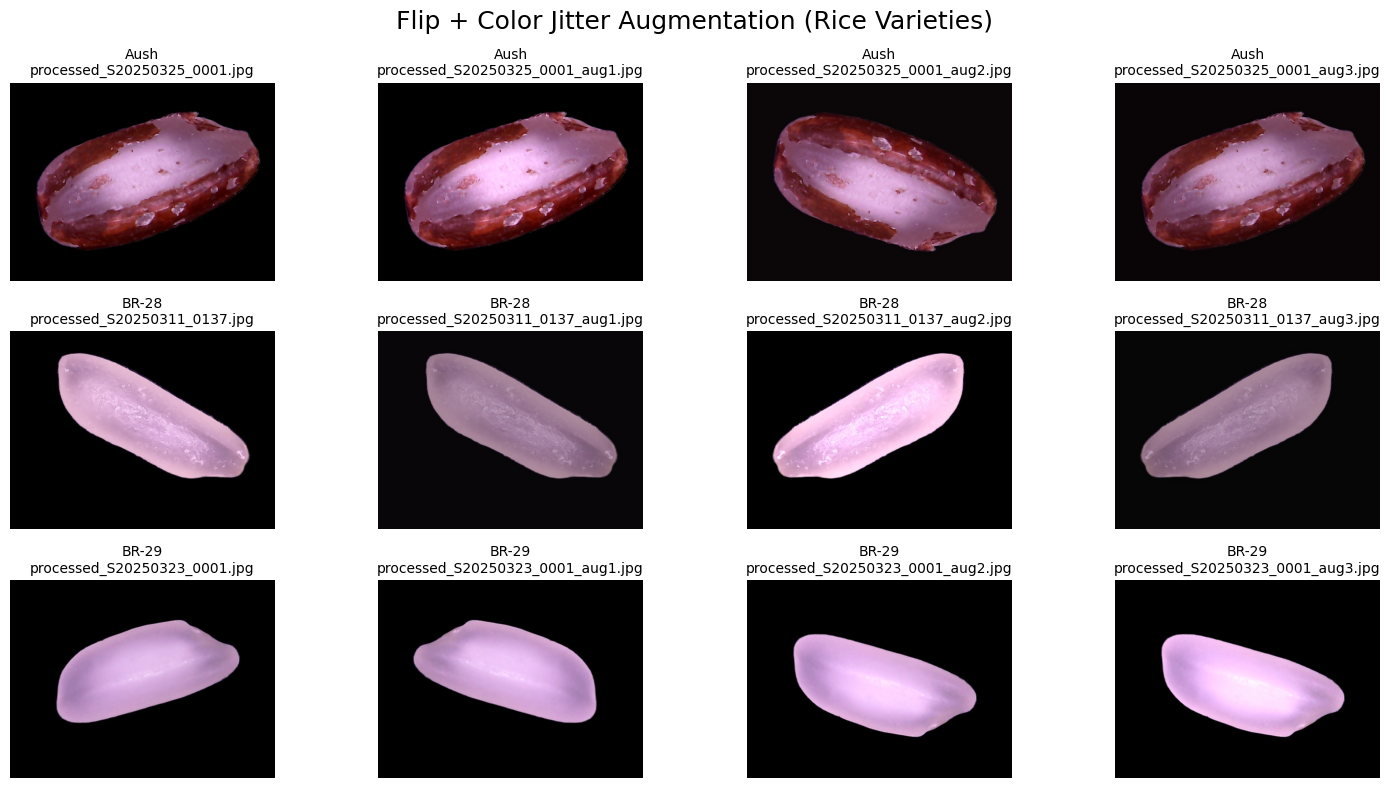

In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

#  Augmentation Functions 
def random_flip(img):
    """Randomly flip image horizontally or vertically."""
    flip_code = np.random.choice([-1, 0, 1])  # -1=both, 0=vertical, 1=horizontal
    return cv2.flip(img, flip_code)

def color_jitter(img, brightness_range=(0.8, 1.2), contrast_range=(0.8, 1.2)):
    """Apply random brightness and contrast jitter."""
    bright_factor = np.random.uniform(*brightness_range)
    contrast_factor = np.random.uniform(*contrast_range)
    img = img.astype(np.float32)
    mean = np.mean(img, axis=(0, 1), keepdims=True)
    img = (img - mean) * contrast_factor + mean
    img *= bright_factor
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img


raw_dir = '/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images'  
augmented_dir = '/kaggle/working/augmented'
os.makedirs(augmented_dir, exist_ok=True)


classes = sorted(os.listdir(raw_dir))
print("Detected rice varieties:", classes)

for cls in classes:
    os.makedirs(os.path.join(augmented_dir, cls), exist_ok=True)

aug_per_image = 4  

#  Augmentation Loop 
for cls in classes:
    class_in = os.path.join(raw_dir, cls)
    class_out = os.path.join(augmented_dir, cls)
    images = sorted(os.listdir(class_in))

    for img_name in images:
        img_path = os.path.join(class_in, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue

        # Original image save
        cv2.imwrite(os.path.join(class_out, img_name), img)

        # Augmentations
        for i in range(aug_per_image):
            aug_img = img.copy()

            if np.random.rand() < 0.8:
                aug_img = random_flip(aug_img)
            if np.random.rand() < 0.9:
                aug_img = color_jitter(aug_img)

            base, ext = os.path.splitext(img_name)
            aug_img_name = f"{base}_aug{i+1}{ext}"
            cv2.imwrite(os.path.join(class_out, aug_img_name), aug_img)

#  Visualization 
plt.figure(figsize=(15, 8))
for idx, cls in enumerate(classes[:3]):  
    class_dir = os.path.join(augmented_dir, cls)
    imgs = sorted(os.listdir(class_dir))[:4]
    for j, img_name in enumerate(imgs):
        img = cv2.imread(os.path.join(class_dir, img_name))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3, 4, idx*4 + j + 1)
        plt.imshow(img_rgb)
        plt.title(f"{cls}\n{img_name}", fontsize=10)
        plt.axis('off')

plt.suptitle("Flip + Color Jitter Augmentation (Rice Varieties)", fontsize=18)
plt.tight_layout()
plt.show()



Detected classes: ['Aush', 'BR-28', 'BR-29', 'Beroi', 'Chinigura', 'Ghee Bhog', 'Katari Najir', 'Katari Siddho', 'Miniket', 'Swarna']


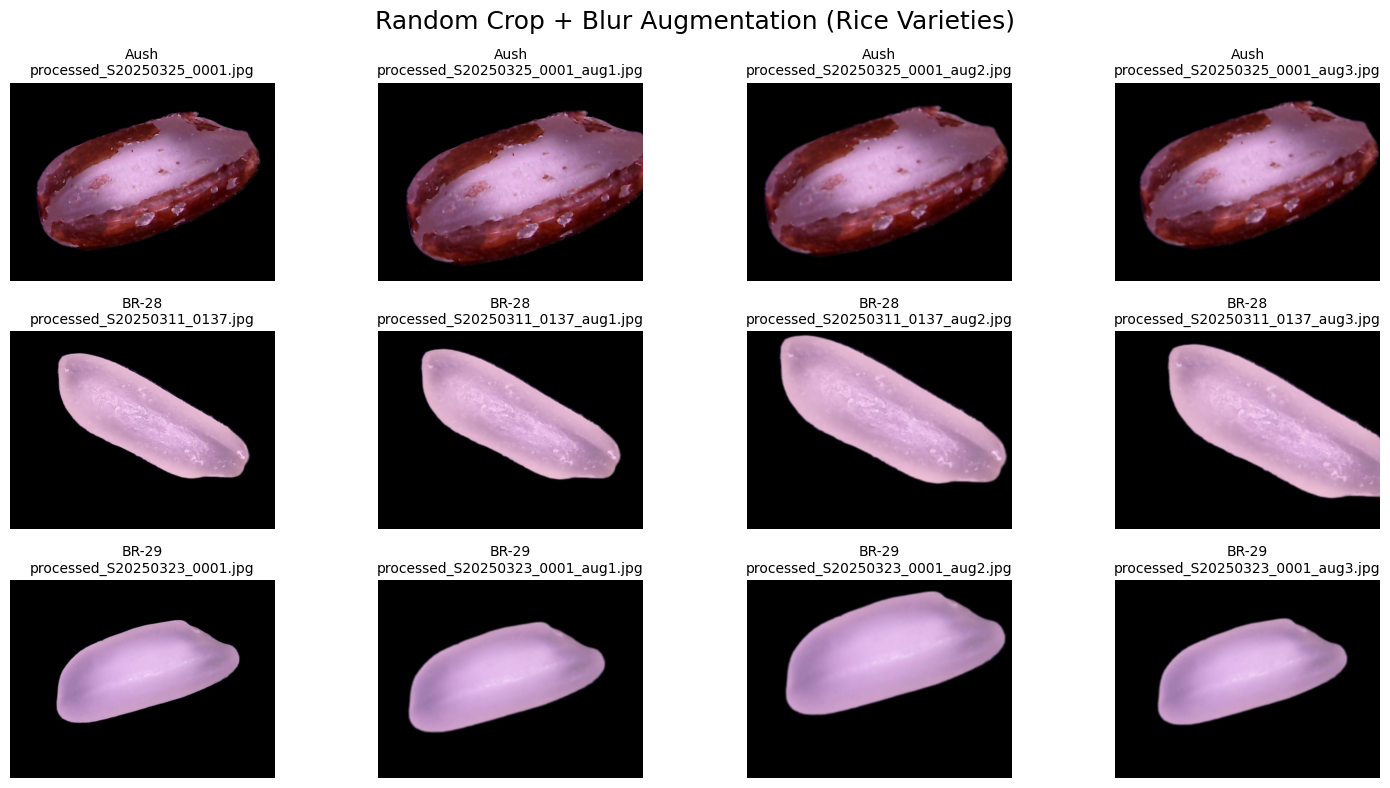

In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

#  Augmentation Functions 
def random_crop(img, crop_scale=(0.8, 1.0)):
    """Randomly crop and resize back to original size."""
    h, w = img.shape[:2]
    scale = np.random.uniform(*crop_scale)
    new_h, new_w = int(h * scale), int(w * scale)
    start_h = np.random.randint(0, h - new_h + 1)
    start_w = np.random.randint(0, w - new_w + 1)
    cropped = img[start_h:start_h + new_h, start_w:start_w + new_w]
    resized = cv2.resize(cropped, (w, h))
    return resized

def random_blur(img, ksize_range=(3, 7)):
    """Apply Gaussian blur with random kernel size."""
    ksize = np.random.choice(range(ksize_range[0], ksize_range[1]+1, 2))  # odd kernel only
    blurred = cv2.GaussianBlur(img, (ksize, ksize), 0)
    return blurred

#  Directory Setup 
raw_dir = '/kaggle/input/processed-rice-varieties-of-bangladesh/Original_Images'
augmented_dir = '/kaggle/working/augmented'
os.makedirs(augmented_dir, exist_ok=True)

# Automatically detect all rice variety folders
classes = sorted(os.listdir(raw_dir))
print("Detected classes:", classes)

for cls in classes:
    os.makedirs(os.path.join(augmented_dir, cls), exist_ok=True)

aug_per_image = 4  

#  Augmentation Loop 
for cls in classes:
    class_in = os.path.join(raw_dir, cls)
    class_out = os.path.join(augmented_dir, cls)
    images = sorted(os.listdir(class_in))

    for img_name in images:
        img_path = os.path.join(class_in, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue

        # Original image save
        cv2.imwrite(os.path.join(class_out, img_name), img)

        # Augmentations
        for i in range(aug_per_image):
            aug_img = img.copy()

            if np.random.rand() < 0.9:
                aug_img = random_crop(aug_img)
            if np.random.rand() < 0.8:
                aug_img = random_blur(aug_img)

            base, ext = os.path.splitext(img_name)
            aug_img_name = f"{base}_aug{i+1}{ext}"
            cv2.imwrite(os.path.join(class_out, aug_img_name), aug_img)

#  Visualization 
plt.figure(figsize=(15, 8))
for idx, cls in enumerate(classes[:3]):  
    class_dir = os.path.join(augmented_dir, cls)
    imgs = sorted(os.listdir(class_dir))[:4]
    for j, img_name in enumerate(imgs):
        img = cv2.imread(os.path.join(class_dir, img_name))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3, 4, idx*4 + j + 1)
        plt.imshow(img_rgb)
        plt.title(f"{cls}\n{img_name}", fontsize=10)
        plt.axis('off')

plt.suptitle("Random Crop + Blur Augmentation (Rice Varieties)", fontsize=18)
plt.tight_layout()
plt.show()
